                                              AI. ML 1 _ Project
                                              Nukavarapu Lalita Aditya Patel - (2002020)
                                              MBA (BA. AI. ML)
                                              23 - 02 - 2021

# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
import csv
import datetime as dt
import scipy.stats as sp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
pet = pd.read_csv('petrol.csv')

In [3]:
pet.describe()

,Delhi,Kolkata,Mumbai,Chennai
count,374.000000,374.000000,374.000000,374.000000
mean,68.582299,71.781872,76.686176,70.895348
std,3.800444,3.420669,3.989632,4.353440
min,56.490000,61.350000,62.750000,56.070000
25%,66.282500,69.452500,75.297500,68.080000
50%,69.265000,72.145000,77.230000,71.780000
75%,71.510000,74.350000,79.620000,74.167500
max,74.070000,81.430000,81.920000,76.930000


In [4]:
pet.columns

Index(['Date', 'Delhi', 'Kolkata', 'Mumbai', 'Chennai'], dtype='object')

In [5]:
pet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     374 non-null    object 
 1   Delhi    374 non-null    float64
 2   Kolkata  374 non-null    float64
 3   Mumbai   374 non-null    float64
 4   Chennai  374 non-null    float64
dtypes: float64(4), object(1)
memory usage: 14.7+ KB


In [6]:
pet.head(10)

,Date,Delhi,Kolkata,Mumbai,Chennai
0,April 19 2018,74.07,76.77,81.92,76.84
1,April 18 2018,74.02,76.73,81.87,76.79
2,April 17 2018,74.02,76.73,81.87,76.79
3,April 16 2018,74.02,76.73,81.87,76.79
4,April 15 2018,73.98,76.69,81.83,76.75
5,April 14 2018,73.93,76.64,81.79,76.69
6,April 13 2018,73.91,76.62,81.77,76.67
7,April 12 2018,73.94,76.65,81.80,76.71
8,April 11 2018,73.98,76.69,81.83,76.75
9,April 10 2018,73.98,76.69,81.83,76.75


In [7]:
pet.tail(10)

,Date,Delhi,Kolkata,Mumbai,Chennai
364,November 01 2014,64.24,71.68,71.91,67.01
365,October 15 2014,66.65,74.21,74.46,69.59
366,October 01 2014,67.86,75.46,75.73,70.87
367,August 31 2014,68.51,76.14,76.41,71.55
368,August 15 2014,70.33,78.03,78.32,73.47
369,August 01 2014,72.51,80.30,80.60,75.78
370,July 01 2014,73.60,81.43,81.75,76.93
371,June 25 2014,71.56,79.42,80.16,74.76
372,June 07 2014,71.51,79.36,80.11,74.71
373,June 01 2014,71.51,79.36,80.11,74.71


In [8]:
pet.isnull().sum()

Date       0
Delhi      0
Kolkata    0
Mumbai     0
Chennai    0
dtype: int64

In [9]:
pet.isna()

,Date,Delhi,Kolkata,Mumbai,Chennai
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
369,False,False,False,False,False
370,False,False,False,False,False
371,False,False,False,False,False
372,False,False,False,False,False


In [10]:
pet.isna().sum()

Date       0
Delhi      0
Kolkata    0
Mumbai     0
Chennai    0
dtype: int64

# Linear Regression

In [11]:
x = pet.iloc[:,1:2].values

In [12]:
x

array([[74.07],
       [74.02],
       [74.02],
       [74.02],
       [73.98],
       [73.93],
       [73.91],
       [73.94],
       [73.98],
       [73.98],
       [73.99],
       [74.03],
       [74.  ],
       [73.98],
       [73.98],
       [73.95],
       [73.95],
       [73.83],
       [73.73],
       [73.55],
       [73.31],
       [73.08],
       [72.9 ],
       [72.9 ],
       [72.79],
       [72.55],
       [72.38],
       [72.3 ],
       [72.26],
       [72.2 ],
       [72.2 ],
       [72.19],
       [72.2 ],
       [72.27],
       [72.37],
       [72.45],
       [72.47],
       [72.47],
       [72.45],
       [72.48],
       [72.46],
       [72.43],
       [72.39],
       [72.39],
       [72.39],
       [72.32],
       [72.26],
       [72.  ],
       [71.75],
       [71.57],
       [71.51],
       [71.51],
       [71.53],
       [71.5 ],
       [71.52],
       [71.61],
       [71.7 ],
       [71.72],
       [71.73],
       [71.92],
       [72.07],
       [72.23],
       [

In [13]:
y = pet.iloc[:,3:4].values

In [14]:
y

array([[81.92],
       [81.87],
       [81.87],
       [81.87],
       [81.83],
       [81.79],
       [81.77],
       [81.8 ],
       [81.83],
       [81.83],
       [81.84],
       [81.88],
       [81.85],
       [81.83],
       [81.83],
       [81.8 ],
       [81.8 ],
       [81.69],
       [81.59],
       [81.41],
       [81.17],
       [80.94],
       [80.77],
       [80.77],
       [80.66],
       [80.42],
       [80.25],
       [80.17],
       [80.13],
       [80.07],
       [80.07],
       [80.06],
       [80.07],
       [80.14],
       [80.24],
       [80.32],
       [80.34],
       [80.34],
       [80.32],
       [80.35],
       [80.33],
       [80.3 ],
       [80.26],
       [80.26],
       [80.26],
       [80.19],
       [80.13],
       [79.87],
       [79.63],
       [79.45],
       [79.39],
       [79.39],
       [79.41],
       [79.38],
       [79.4 ],
       [79.49],
       [79.58],
       [79.6 ],
       [79.61],
       [79.8 ],
       [79.94],
       [80.1 ],
       [

Text(0, 0.5, 'Mumbai')

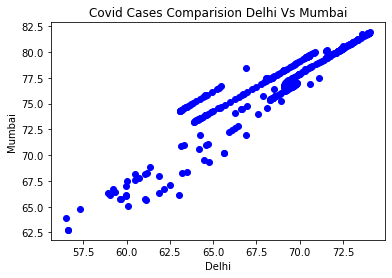

In [15]:
plt.scatter(x,y,color = 'blue')
plt.title('Covid Cases Comparision Delhi Vs Mumbai')
plt.xlabel('Delhi')
plt.ylabel('Mumbai')

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [18]:
x_train

array([[61.87],
       [73.38],
       [69.13],
       [72.9 ],
       [69.85],
       [68.48],
       [68.51],
       [73.83],
       [71.5 ],
       [69.32],
       [62.51],
       [71.57],
       [59.03],
       [68.88],
       [71.51],
       [73.09],
       [70.28],
       [64.59],
       [68.38],
       [70.52],
       [71.51],
       [72.48],
       [59.63],
       [70.42],
       [69.07],
       [66.1 ],
       [63.06],
       [72.  ],
       [68.58],
       [62.19],
       [64.91],
       [69.07],
       [72.55],
       [72.23],
       [73.98],
       [70.41],
       [60.7 ],
       [72.2 ],
       [68.84],
       [63.13],
       [71.56],
       [74.02],
       [69.09],
       [68.45],
       [72.47],
       [64.87],
       [69.81],
       [65.6 ],
       [66.66],
       [59.99],
       [63.33],
       [73.31],
       [71.51],
       [60.49],
       [69.47],
       [70.38],
       [73.1 ],
       [70.51],
       [68.62],
       [72.38],
       [70.76],
       [69.65],
       [

In [19]:
x_test

array([[59.95],
       [63.99],
       [71.72],
       [56.61],
       [70.66],
       [72.37],
       [59.35],
       [64.23],
       [72.92],
       [69.54],
       [71.92],
       [69.97],
       [73.98],
       [68.14],
       [64.58],
       [63.19],
       [69.71],
       [68.72],
       [69.23],
       [68.35],
       [71.73],
       [63.55],
       [67.86],
       [74.07],
       [68.09],
       [56.49],
       [70.66],
       [64.28],
       [65.32],
       [73.93],
       [64.44],
       [68.6 ],
       [68.67],
       [64.21],
       [68.36],
       [74.02],
       [73.16],
       [73.38],
       [69.9 ],
       [68.08],
       [61.2 ],
       [69.15],
       [70.3 ],
       [69.26],
       [68.29],
       [72.23],
       [69.22],
       [61.09],
       [74.03],
       [73.31],
       [69.97],
       [64.53],
       [70.46],
       [64.65],
       [69.36],
       [69.26],
       [66.28],
       [69.12],
       [64.15],
       [72.63],
       [72.77],
       [69.22],
       [

In [20]:
y_train

array([[67.96],
       [81.24],
       [76.24],
       [80.77],
       [76.95],
       [75.59],
       [76.41],
       [81.69],
       [79.38],
       [76.52],
       [67.11],
       [79.45],
       [66.09],
       [78.  ],
       [79.39],
       [80.95],
       [78.17],
       [73.92],
       [77.51],
       [79.63],
       [79.39],
       [80.35],
       [65.73],
       [79.53],
       [76.66],
       [72.46],
       [74.28],
       [79.87],
       [75.69],
       [66.71],
       [76.14],
       [76.18],
       [80.42],
       [80.1 ],
       [81.83],
       [79.52],
       [67.77],
       [80.07],
       [75.95],
       [74.35],
       [80.16],
       [81.87],
       [76.64],
       [77.58],
       [80.34],
       [74.2 ],
       [77.71],
       [70.18],
       [75.8 ],
       [66.09],
       [70.95],
       [81.17],
       [80.11],
       [68.14],
       [76.57],
       [79.48],
       [80.96],
       [79.62],
       [75.73],
       [80.25],
       [79.87],
       [77.55],
       [

In [21]:
y_test

array([[66.05],
       [75.23],
       [79.6 ],
       [62.75],
       [78.55],
       [80.24],
       [66.4 ],
       [75.46],
       [80.79],
       [76.64],
       [79.8 ],
       [77.87],
       [81.83],
       [77.27],
       [71.  ],
       [74.41],
       [78.82],
       [75.83],
       [76.61],
       [77.48],
       [79.61],
       [74.79],
       [75.73],
       [81.92],
       [77.46],
       [63.9 ],
       [79.77],
       [73.61],
       [76.55],
       [81.79],
       [75.68],
       [75.71],
       [77.79],
       [70.64],
       [77.49],
       [81.87],
       [81.02],
       [81.24],
       [77.8 ],
       [77.21],
       [68.25],
       [76.99],
       [79.41],
       [76.52],
       [77.42],
       [80.1 ],
       [76.52],
       [65.7 ],
       [81.88],
       [81.17],
       [77.87],
       [73.87],
       [79.57],
       [75.88],
       [76.52],
       [78.38],
       [75.43],
       [76.62],
       [73.49],
       [80.5 ],
       [80.64],
       [76.52],
       [

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regressor = LinearRegression()

In [24]:
regressor.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred = regressor.predict(x_test)

In [26]:
y_test

array([[66.05],
       [75.23],
       [79.6 ],
       [62.75],
       [78.55],
       [80.24],
       [66.4 ],
       [75.46],
       [80.79],
       [76.64],
       [79.8 ],
       [77.87],
       [81.83],
       [77.27],
       [71.  ],
       [74.41],
       [78.82],
       [75.83],
       [76.61],
       [77.48],
       [79.61],
       [74.79],
       [75.73],
       [81.92],
       [77.46],
       [63.9 ],
       [79.77],
       [73.61],
       [76.55],
       [81.79],
       [75.68],
       [75.71],
       [77.79],
       [70.64],
       [77.49],
       [81.87],
       [81.02],
       [81.24],
       [77.8 ],
       [77.21],
       [68.25],
       [76.99],
       [79.41],
       [76.52],
       [77.42],
       [80.1 ],
       [76.52],
       [65.7 ],
       [81.88],
       [81.17],
       [77.87],
       [73.87],
       [79.57],
       [75.88],
       [76.52],
       [78.38],
       [75.43],
       [76.62],
       [73.49],
       [80.5 ],
       [80.64],
       [76.52],
       [

In [27]:
y_pred

array([[67.97318458],
       [72.02176703],
       [79.7681884 ],
       [64.62608919],
       [78.70593657],
       [80.41956924],
       [67.37190996],
       [72.26227688],
       [80.97073764],
       [77.58355727],
       [79.96861327],
       [78.01447075],
       [82.03298947],
       [76.18058316],
       [72.61302041],
       [71.22006753],
       [77.75391842],
       [76.76181529],
       [77.27289872],
       [76.39102928],
       [79.77820964],
       [71.58083231],
       [75.89998833],
       [82.12318066],
       [76.13047694],
       [64.50583427],
       [78.70593657],
       [72.3123831 ],
       [73.35459244],
       [81.98288325],
       [72.47272299],
       [76.64156037],
       [76.71170907],
       [72.24223439],
       [76.40105052],
       [82.07307444],
       [81.21124749],
       [81.43171485],
       [77.94432205],
       [76.1204557 ],
       [69.22584004],
       [77.19272877],
       [78.34517179],
       [77.30296245],
       [76.33090181],
       [80

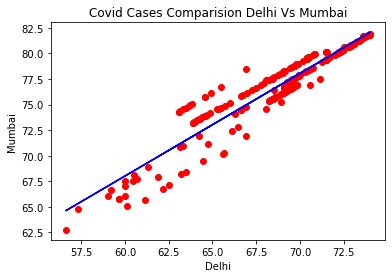

In [28]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Covid Cases Comparision Delhi Vs Mumbai')
plt.xlabel('Delhi')
plt.ylabel('Mumbai')
plt.show()

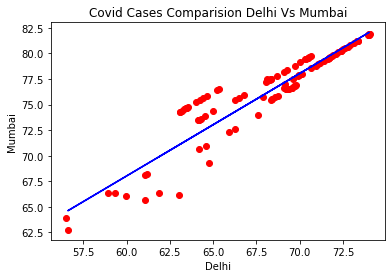

In [29]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Covid Cases Comparision Delhi Vs Mumbai')
plt.xlabel('Delhi')
plt.ylabel('Mumbai')
plt.show()

In [30]:
y_pred = regressor.predict(x_test)

In [31]:
print(regressor.intercept_)

[7.8958287]


In [32]:
print(regressor.coef_)

[[1.00212437]]


# Multiple Linear Regression

In [33]:
data = pd.read_csv('Testing in Karnataka.csv')

In [34]:
data

,Date,Samples,Samples Cumulative,Negative,Negative Cumulative,Positive,Positive Cumulative
0,2020-03-13,60,639,80,540,0,6
1,2020-03-14,92,731,50,590,0,6
2,2020-03-15,131,862,19,609,0,6
3,2020-03-16,33,895,86,695,1,7
4,2020-03-17,48,943,71,766,4,11
5,2020-03-18,125,1068,103,869,3,14
6,2020-03-19,75,1143,46,915,1,15
7,2020-03-20,64,1207,55,970,0,15
8,2020-03-21,170,1377,26,996,5,20
9,2020-03-22,10,1387,112,1108,6,26


In [35]:
data.head(10)

,Date,Samples,Samples Cumulative,Negative,Negative Cumulative,Positive,Positive Cumulative
0,2020-03-13,60,639,80,540,0,6
1,2020-03-14,92,731,50,590,0,6
2,2020-03-15,131,862,19,609,0,6
3,2020-03-16,33,895,86,695,1,7
4,2020-03-17,48,943,71,766,4,11
5,2020-03-18,125,1068,103,869,3,14
6,2020-03-19,75,1143,46,915,1,15
7,2020-03-20,64,1207,55,970,0,15
8,2020-03-21,170,1377,26,996,5,20
9,2020-03-22,10,1387,112,1108,6,26


In [36]:
print(data.shape)

(30, 7)


In [37]:
print(data.columns)

Index(['Date', 'Samples', 'Samples Cumulative', 'Negative',
       'Negative Cumulative', 'Positive', 'Positive Cumulative'],
      dtype='object')


In [38]:
data.nunique(axis = 0)

Date                   30
Samples                30
Samples Cumulative     30
Negative               30
Negative Cumulative    30
Positive               14
Positive Cumulative    27
dtype: int64

In [39]:
data.describe()

,Samples,Samples Cumulative,Negative,Negative Cumulative,Positive,Positive Cumulative
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,255.566667,3374.000000,214.500000,3062.466667,6.966667,83.766667
std,185.029855,2420.289951,174.978964,2343.036061,4.810071,69.438975
min,10.000000,639.000000,19.000000,540.000000,0.000000,6.000000
25%,103.250000,1249.500000,73.250000,976.500000,4.000000,16.250000
50%,200.500000,2957.000000,178.500000,2663.000000,7.000000,70.000000
75%,374.000000,4942.500000,316.750000,4494.750000,10.000000,140.000000
max,617.000000,8560.000000,656.000000,8231.000000,16.000000,215.000000


In [40]:
data.duplicated().sum()
data.shape

(30, 7)

In [41]:
data.drop_duplicates(subset=None, inplace=True)
data.shape

(30, 7)

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [43]:
data.head()
data['Samples Cumulative']=le.fit_transform(data['Samples'])
data['Negative Cumulative']=le.fit_transform(data['Negative'])
data['Positive Cumulative']=le.fit_transform(data['Positive'])

In [44]:
data.head(15)

,Date,Samples,Samples Cumulative,Negative,Negative Cumulative,Positive,Positive Cumulative
0,2020-03-13,60,3,80,8,0,0
1,2020-03-14,92,6,50,5,0,0
2,2020-03-15,131,9,19,0,0,0
3,2020-03-16,33,1,86,9,1,1
4,2020-03-17,48,2,71,7,4,3
5,2020-03-18,125,8,103,10,3,2
6,2020-03-19,75,5,46,4,1,1
7,2020-03-20,64,4,55,6,0,0
8,2020-03-21,170,11,26,1,5,4
9,2020-03-22,10,0,112,11,6,5


In [45]:
data[['Positive Cumulative','Positive']].sample(10)

,Positive Cumulative,Positive
3,1,1
9,5,6
7,0,0
4,3,4
6,1,1
14,8,9
22,13,16
19,8,9
20,12,14
5,2,3


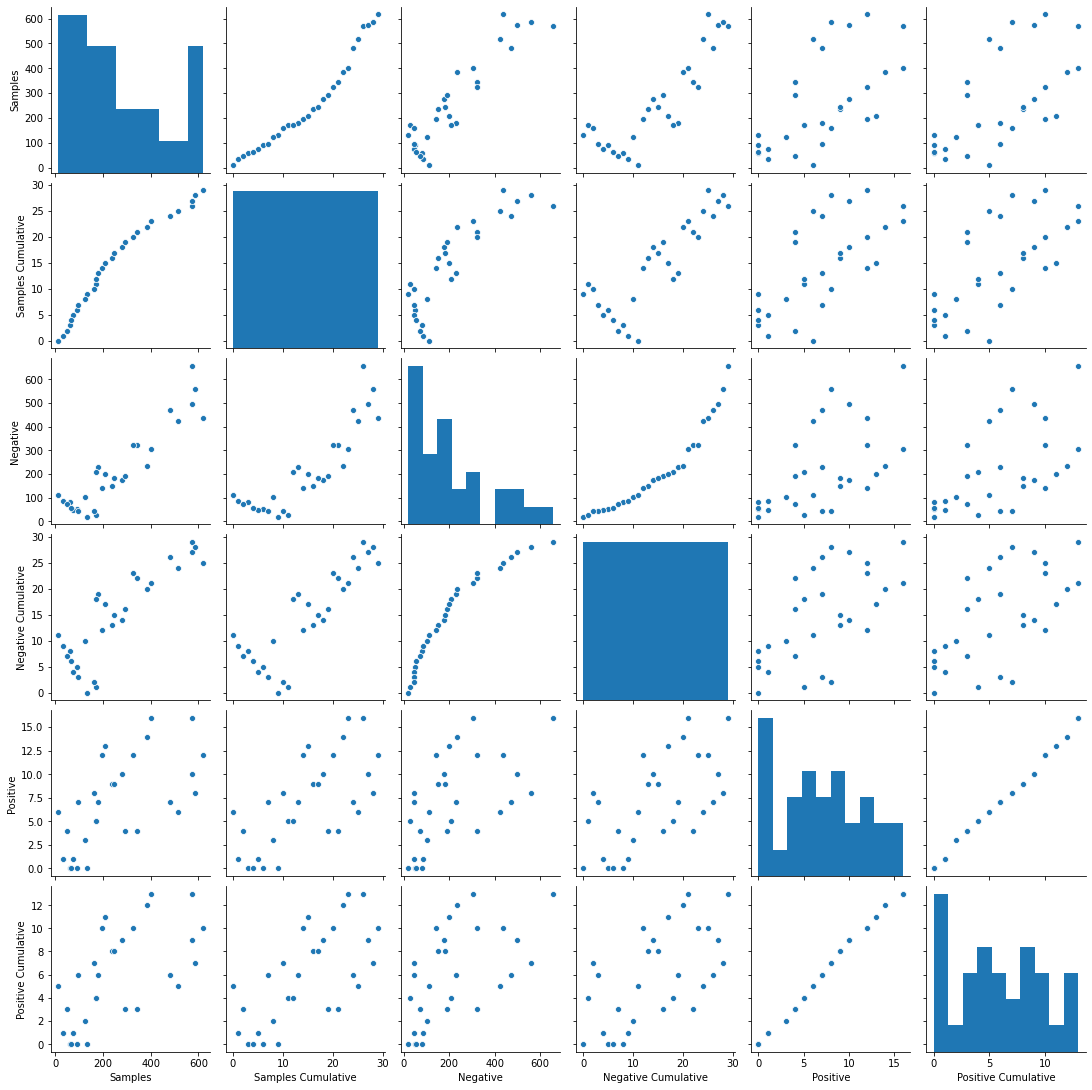

In [46]:
sn.pairplot(data)

In [47]:
data.corr()

,Samples,Samples Cumulative,Negative,Negative Cumulative,Positive,Positive Cumulative
Samples,1.000000,0.970545,0.925797,0.863999,0.621211,0.621316
Samples Cumulative,0.970545,1.000000,0.865297,0.850501,0.679557,0.680613
Negative,0.925797,0.865297,1.000000,0.944519,0.577614,0.571821
Negative Cumulative,0.863999,0.850501,0.944519,1.000000,0.616040,0.610437
Positive,0.621211,0.679557,0.577614,0.616040,1.000000,0.997349
Positive Cumulative,0.621316,0.680613,0.571821,0.610437,0.997349,1.000000


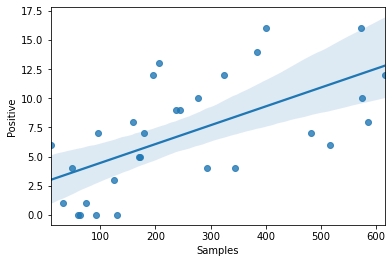

In [48]:
sn.regplot(x = data['Samples'], y = data['Positive'])

In [49]:
x = pd.DataFrame(data, columns = ['Samples Cumulative','Negative','Negative Cumulative','Positive','Positive Cumulative'])
y = pd.DataFrame(data, columns = ['Samples'])

In [50]:
x.head(10)

,Samples Cumulative,Negative,Negative Cumulative,Positive,Positive Cumulative
0,3,80,8,0,0
1,6,50,5,0,0
2,9,19,0,0,0
3,1,86,9,1,1
4,2,71,7,4,3
5,8,103,10,3,2
6,5,46,4,1,1
7,4,55,6,0,0
8,11,26,1,5,4
9,0,112,11,6,5


In [51]:
y.head(10)

,Samples
0,60
1,92
2,131
3,33
4,48
5,125
6,75
7,64
8,170
9,10


In [52]:
from sklearn.model_selection import train_test_split 

In [53]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

In [54]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  

LinearRegression()

In [55]:
reg = LinearRegression().fit(x, y)

In [56]:
print("intercept:",reg.intercept_)
print("slope:",reg.coef_)

intercept: [-2.07770292]
slope: [[15.47234358  0.62769892 -6.27698855 -8.65441034  8.51636844]]


In [57]:
y_pred= regressor.predict(x_test)  

In [58]:
from sklearn.metrics import r2_score, mean_squared_error

In [59]:
score=r2_score(y_test,y_pred)
print(score)

0.9782756284503141


In [60]:
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test))  

Train Score:  0.9816960724490188
Test Score:  0.9782756284503141


# Polynomial Linear Regression

In [61]:
sam = pd.read_csv("sample.csv")

In [62]:
sam

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [63]:
sam.describe

<bound method NDFrame.describe of    sno  Temperature  Pressure
0    1            0    0.0002
1    2           20    0.0012
2    3           40    0.0060
3    4           60    0.0300
4    5           80    0.0900
5    6          100    0.2700>

In [64]:
sam.head(5)

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [65]:
X = sam.iloc[:,1:2].values

In [66]:
X

array([[  0],
       [ 20],
       [ 40],
       [ 60],
       [ 80],
       [100]], dtype=int64)

In [67]:
X = sam['Temperature'].values.reshape(-1,1)

In [68]:
X

array([[  0],
       [ 20],
       [ 40],
       [ 60],
       [ 80],
       [100]], dtype=int64)

In [69]:
Y = sam['Pressure'].values.reshape(-1,1)

In [70]:
Y

array([[2.0e-04],
       [1.2e-03],
       [6.0e-03],
       [3.0e-02],
       [9.0e-02],
       [2.7e-01]])

In [71]:
sam

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [72]:
regressor = LinearRegression()

In [73]:
regressor.fit(X,Y)

LinearRegression()

In [74]:
y_pred=regressor.predict(X)

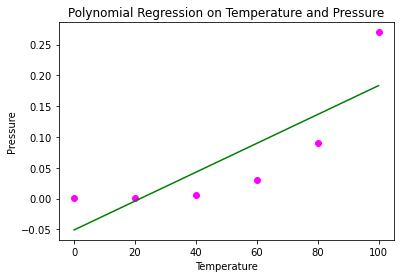

In [75]:
plt.scatter(X, Y, color = 'magenta')
plt.plot(X, y_pred, color = 'green')
plt.title('Polynomial Regression on Temperature and Pressure')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()

In [76]:
from sklearn.preprocessing import PolynomialFeatures

In [77]:
poly=PolynomialFeatures(degree = 2)

In [78]:
X_poly = poly.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_poly,Y)
y_poly_pred=regressor.predict(X_poly)

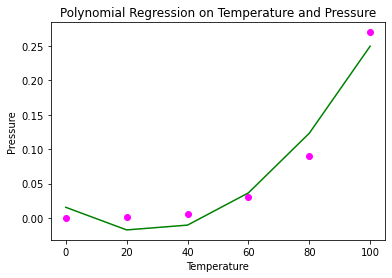

In [79]:
plt.scatter(X, Y, color = 'magenta')
plt.plot(X, y_poly_pred, color = 'green')
plt.title('Polynomial Regression on Temperature and Pressure')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()


In [80]:
rmse = np.sqrt(mean_squared_error(Y,y_poly_pred))
r2 = r2_score(Y,y_poly_pred)
print('RMSE is ' + str(rmse))
print('r2 is ' +str(r2))

RMSE is 0.020000258331664945
r2 is 0.9568461098911795


In [81]:
regressor.predict(poly.fit_transform([[2.5]]))

array([[0.0092632]])

In [82]:
regressor.coef_

array([[ 0.00000e+00, -2.63925e-03,  4.98125e-05]])

# Decision Tree

In [83]:
!pip install six 
!pip install pydotplus
!pip install graphviz

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [85]:
soc = pd.read_csv('Social.csv')

In [86]:
soc.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [87]:
feature_cols = ['Age','EstimatedSalary' ]

In [88]:
X = soc.iloc[:,[2,3]].values

In [89]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [90]:
y = soc.iloc[:,4].values

In [91]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [93]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [94]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [95]:
#prediction
y_pred = classifier.predict(X_test)#Accuracy
from sklearn import metrics 
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.89


In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [97]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from io import StringIO

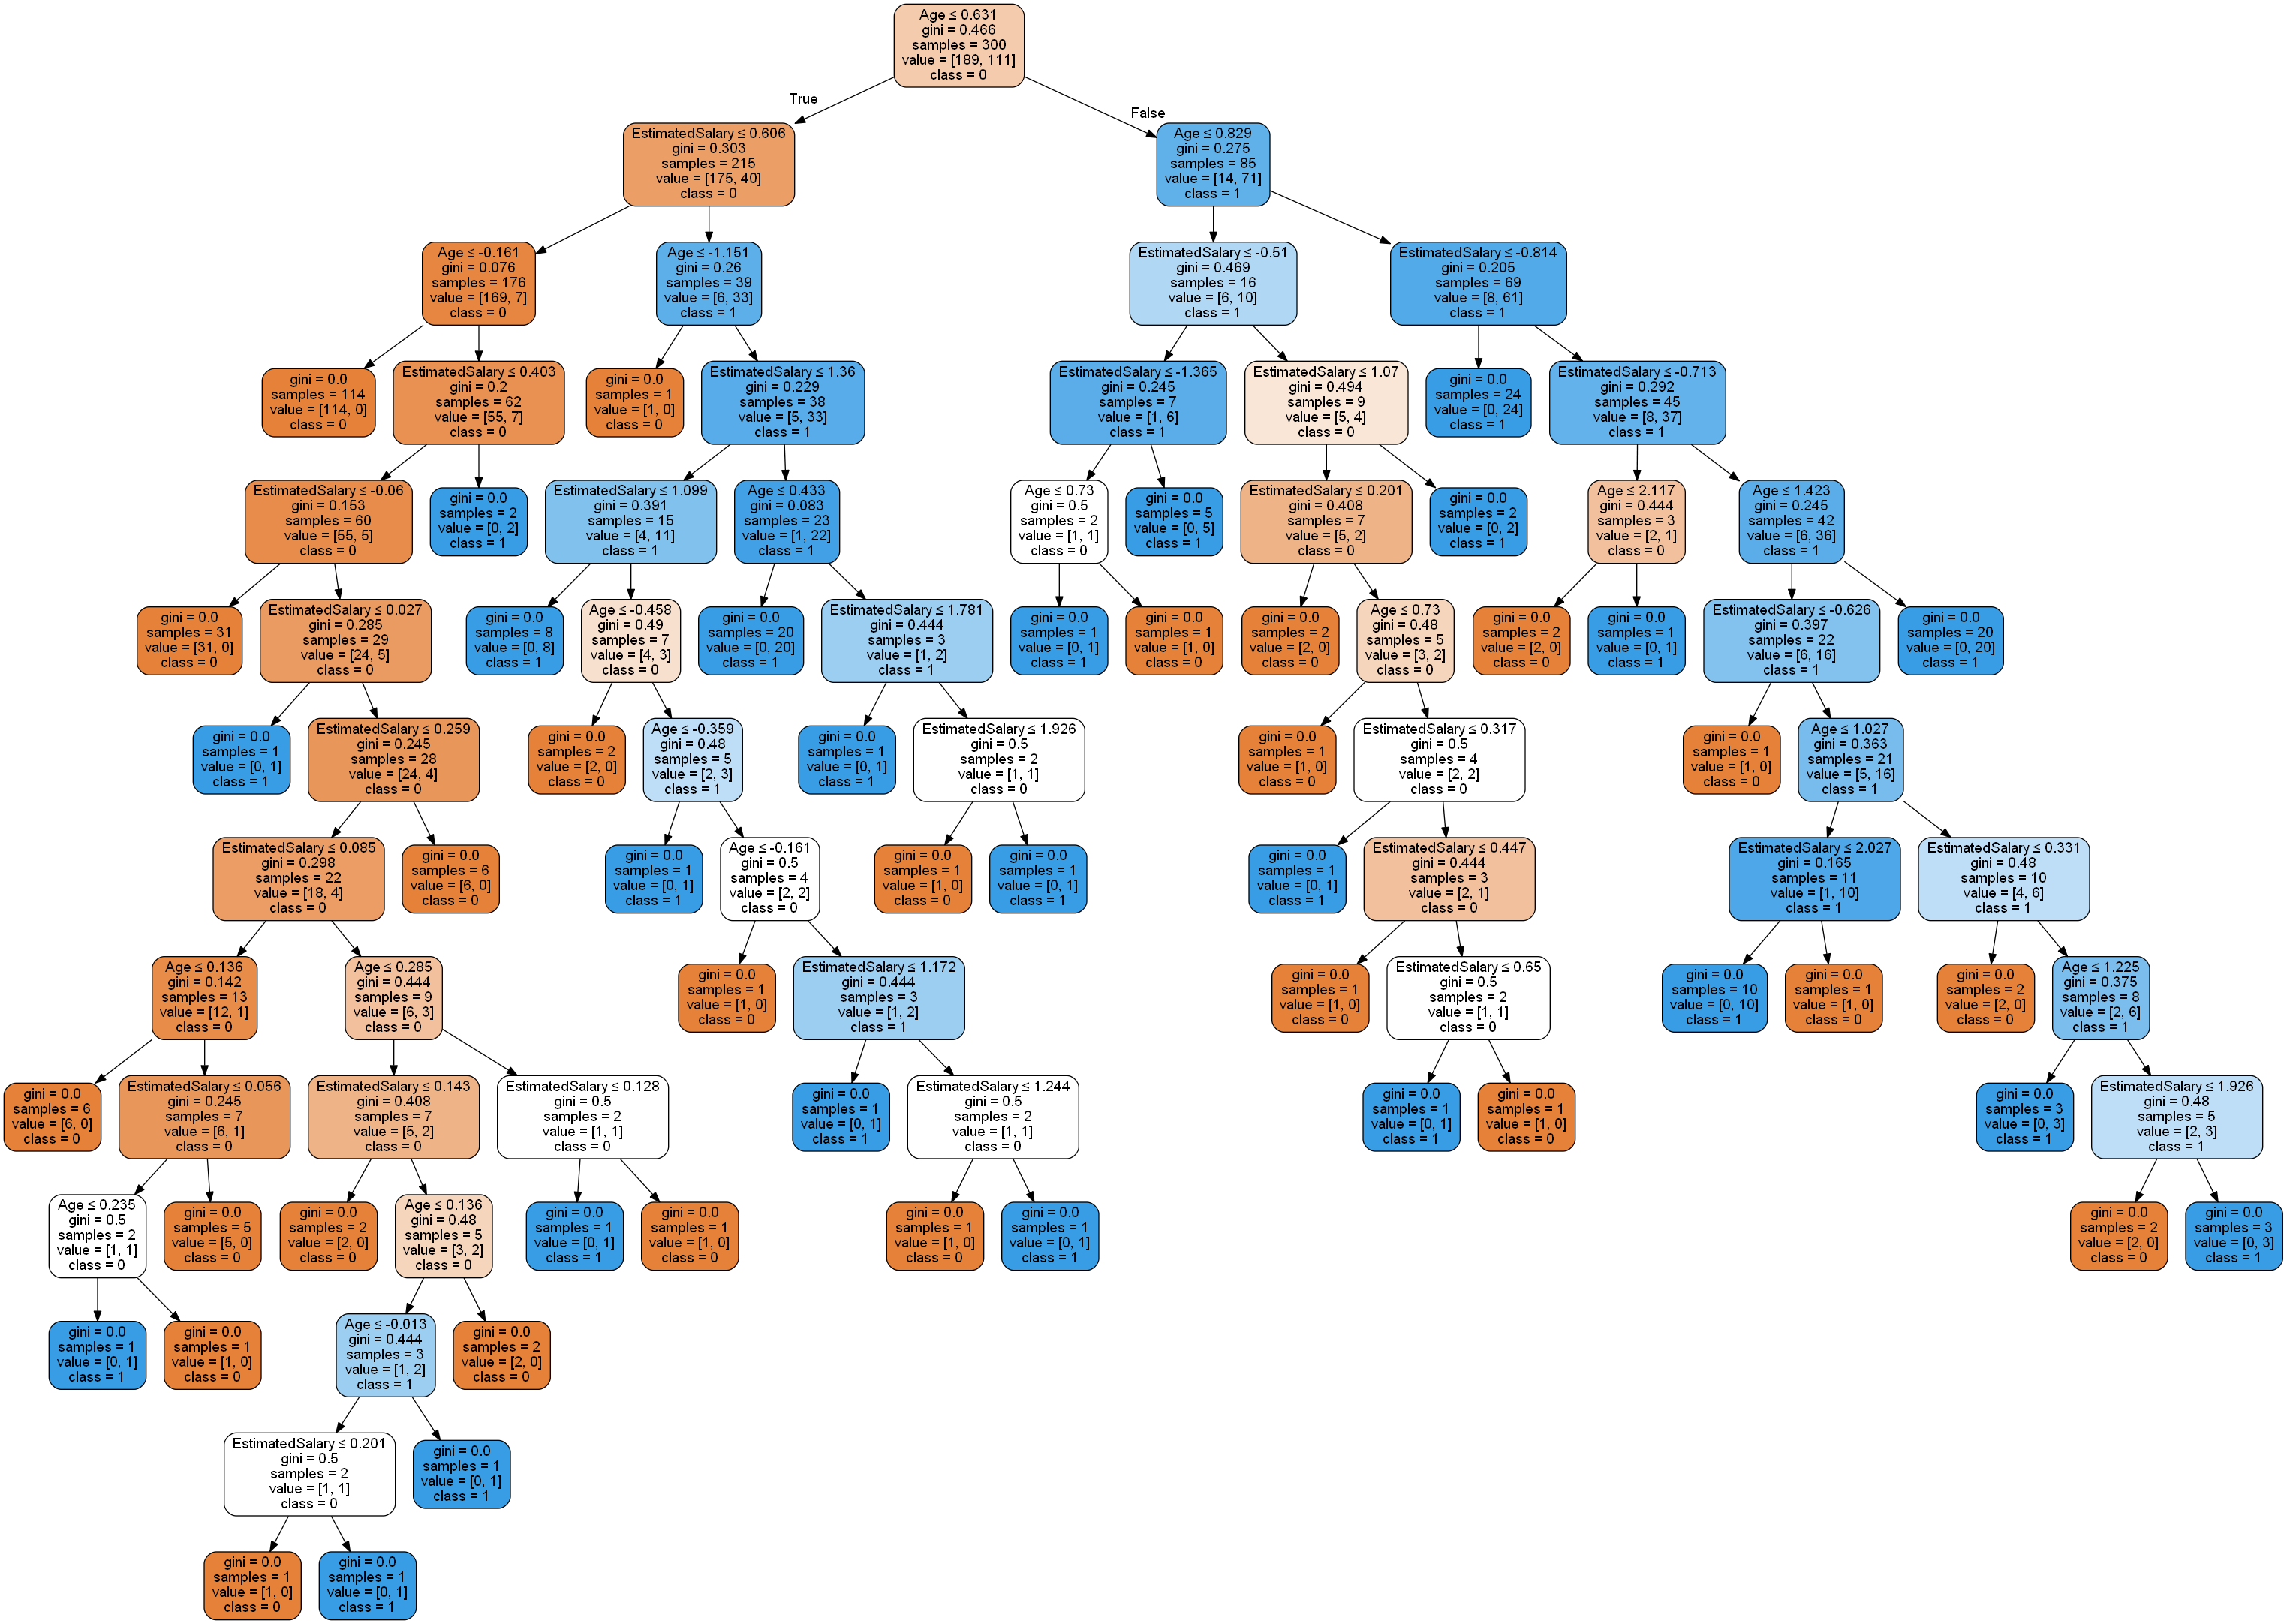

In [98]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [99]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.94


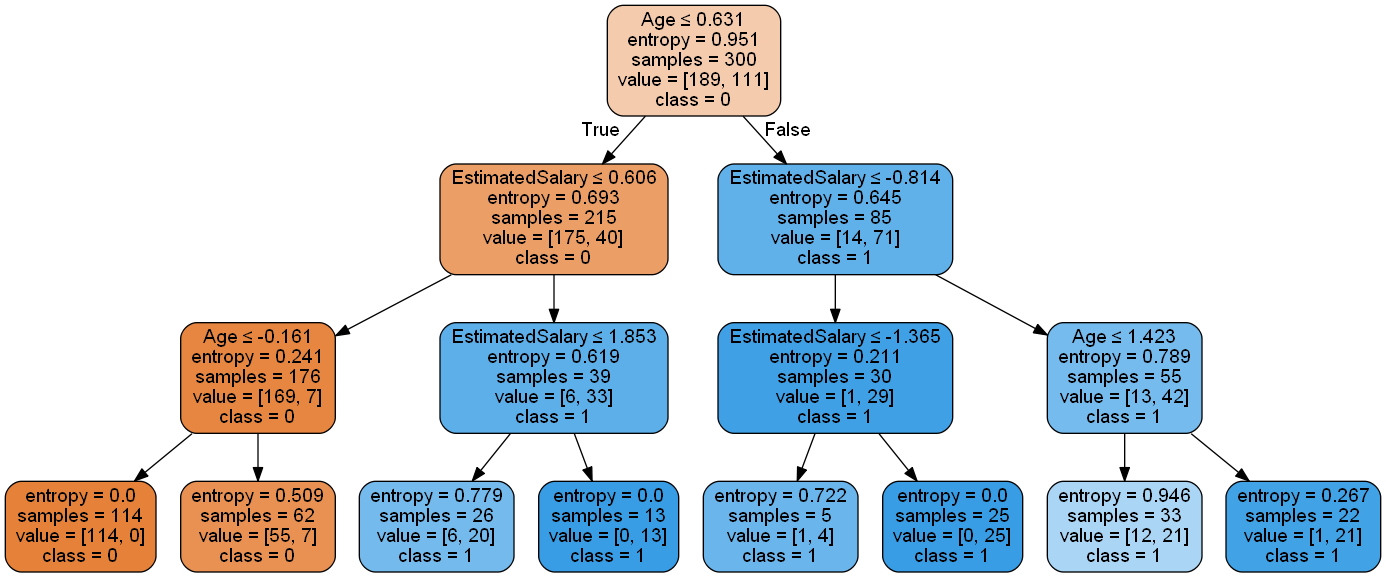

In [100]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())